In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


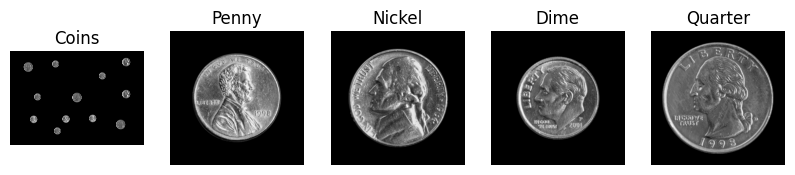

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

coins = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/coins.png',cv.IMREAD_GRAYSCALE)
assert coins is not None

p = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Penny.png',cv.IMREAD_GRAYSCALE)
assert p is not None

n = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Nickel.png',cv.IMREAD_GRAYSCALE)
assert n is not None

d = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Dime.png',cv.IMREAD_GRAYSCALE)
assert d is not None

q = cv.imread('/content/drive/MyDrive/Image Processing EN3160/Coins/Quarter.png',cv.IMREAD_GRAYSCALE)
assert q is not None

# Display the images
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(X = coins,cmap='gray')
plt.title(label = 'Coins')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(X = p,cmap='gray')
plt.title(label = 'Penny')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(X = n,cmap='gray')
plt.title(label = 'Nickel')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow( X = d,cmap='gray')
plt.title(label = 'Dime')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(X = q,cmap='gray')
plt.title(label = 'Quarter')
plt.axis('off')

plt.show()

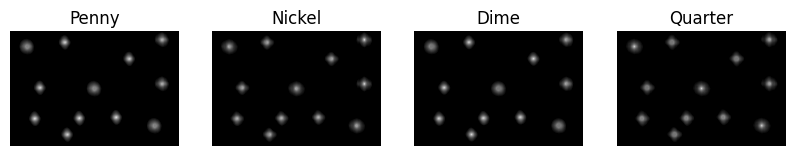

In [ ]:
p_resp = cv.matchTemplate(coins,p,cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins,n,cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins,d,cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins,q,cv.TM_CCOEFF_NORMED)

plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
plt.imshow(X = p_resp,cmap='gray', vmin = 0, vmax = 1)
plt.title(label = 'Penny')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(X = n_resp,cmap='gray', vmin = 0, vmax = 1)
plt.title(label = 'Nickel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(X = d_resp,cmap='gray', vmin = 0, vmax = 1)
plt.title(label = 'Dime')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(X = q_resp,cmap='gray', vmin = 0, vmax = 1)
plt.title(label = 'Quarter')
plt.axis('off')

plt.show()

All the coins have responded.

Intensity of pennies are a little bit high. Others are a little bit low.

Have to find the highest intensity in both horizontal and vertical directions. Therefore have to do an argmax.

In [ ]:
#Vertically stack the responses along a new axis
results = np.stack(arrays = [p_resp, n_resp, d_resp, q_resp], axis = 2)

In [ ]:
results.shape

(2181, 3209, 4)

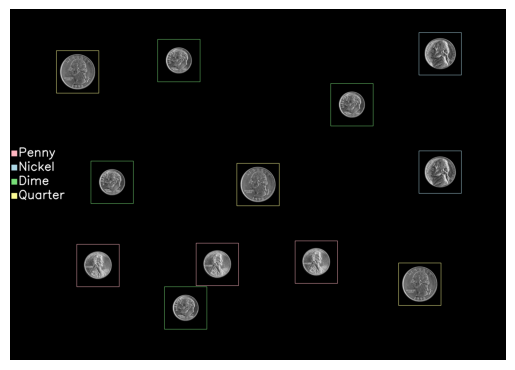

In [ ]:
from skimage.feature import peak_local_max

pastel_colors = [
    (255, 182, 193), # Pastel Pink
    (173, 216, 230), # Pastel Blue
    (119, 221, 119), # Pastel Green
    (253, 253, 150) # Pastel Yellow
]

# Make a color image to draw on
coins_color = cv.cvtColor(src = coins, code = cv.COLOR_GRAY2BGR)

# Find local maxima
coordinates = peak_local_max(results, exclude_border=0, min_distance=5,threshold_abs=0.8)
coordinates

# Draw rectangles on detected coins
h = p.shape[0]  # Assuming all templates are square and have the same size
# Plot on each color
for i, coord in enumerate(coordinates):
    c = coord[2]
    cv.rectangle(coins_color, (coord[1], coord[0]), (coord[1] +h , coord[0]+h), pastel_colors[c], 2)

# print a legend
spacing = 100  # Increased spacing between legend items
for i, (name, color) in enumerate(zip(['Penny', 'Nickel', 'Dime', 'Quarter'], pastel_colors)):
    cv.rectangle(coins_color, (10, 1000 + spacing * i), (50, 1040 + spacing * i), color, -1)
    cv.putText(coins_color, name, (60, 1040 + spacing * i), cv.FONT_HERSHEY_SIMPLEX, 2.8, (255, 255, 255), 6, cv.LINE_AA)


plt.imshow(X = coins_color)
plt.axis('off')
plt.show()

In [ ]:
coin_counts = [0, 0, 0, 0]

for coord in coordinates:
    c = coord[2]
    coin_counts[c] += 1
    cv.rectangle(coins_color, (coord[1], coord[0]), (coord[1] + h, coord[0] + h), pastel_colors[c], 2)

In [ ]:
# Display coin counts
print("Coin Counts:")
print(f"Penny: {coin_counts[0]}")
print(f"Nickel: {coin_counts[1]}")
print(f"Dime: {coin_counts[2]}")
print(f"Quarter: {coin_counts[3]}")


Coin Counts:
Penny: 3
Nickel: 2
Dime: 4
Quarter: 3


### Each coin type has a fixed denomination:

Penny = $0.01

Nickel = $0.05

Dime = $0.10

Quarter = $0.25

In [ ]:
# Coin values
coin_values = [0.01, 0.05, 0.10, 0.25]  # Penny, Nickel, Dime, Quarter

# Calculate total amount
total_amount = sum(count * value for count, value in zip(coin_counts, coin_values))

print(f"Total Amount: ${total_amount:.2f}")

Total Amount: $1.28
